<a href="https://colab.research.google.com/github/Gaurav-Sharma-007/Titanic/blob/main/TitanicUsingLogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

sns.set_theme()

In [3]:
df = pd.read_csv('/content/train.csv')

df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(f'Length of dataset is: {df.shape[0]}')

Length of dataset is: 891


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

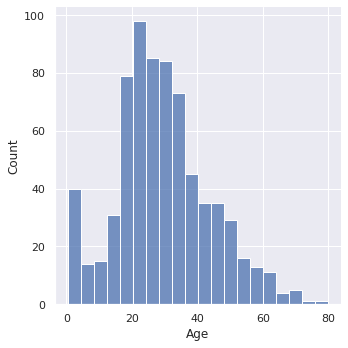

In [7]:
sns.displot(df, x="Age")

***Age Distribution of All Passengers***

In [8]:
print(f"The average age is: {round(df['Age'].mean(), 2)}")

The average age is: 29.7


Total Number of Passengers : 891
Total Number of Male Passengers : 577
Total Nubmer of Female Passengers : 314


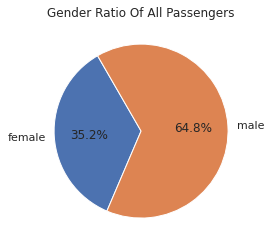

In [11]:
sex_ = df[['PassengerId','Sex']].groupby('Sex')['PassengerId'].count().reset_index()
colors = sns.color_palette()[0:sex_.shape[0]]
plt.pie(sex_['PassengerId'], labels=sex_['Sex'], colors=colors, autopct='%1.1f%%', startangle=120)
plt.title('Gender Ratio Of All Passengers')
print(f"Total Number of Passengers : {sex_['PassengerId'].sum()}")
print(f"Total Number of Male Passengers : {sex_[sex_['Sex']=='male']['PassengerId'].sum()}")
print(f"Total Nubmer of Female Passengers : {sex_[sex_['Sex']=='female']['PassengerId'].sum()}")
plt.show()

Total Number of Survived Passengers : 342
Total Number of Survived Male Passengers : 109
Total Nubmer of Survived Female Passengers : 233


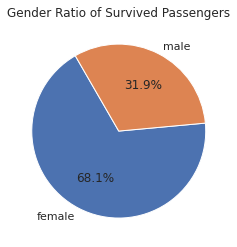

In [12]:
sex_ = df[df['Survived']==1][['PassengerId','Sex']].groupby('Sex')['PassengerId'].count().reset_index()
colors = sns.color_palette()[0:sex_.shape[0]]
plt.pie(sex_['PassengerId'], labels=sex_['Sex'], colors=colors, autopct='%1.1f%%', startangle=120)
plt.title('Gender Ratio of Survived Passengers')
print(f"Total Number of Survived Passengers : {sex_['PassengerId'].sum()}")
print(f"Total Number of Survived Male Passengers : {sex_[sex_['Sex']=='male']['PassengerId'].sum()}")
print(f"Total Nubmer of Survived Female Passengers : {sex_[sex_['Sex']=='female']['PassengerId'].sum()}")
plt.show()

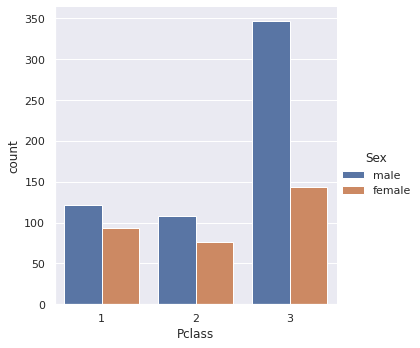

In [13]:
sns.catplot(x='Pclass', data=df, hue='Sex', kind='count')

***Creating Our Model for the Prediction***

In [16]:
X = pd.get_dummies(df[['Sex', 'SibSp', 'Parch', 'Pclass']])
y = df['Survived']

X.head(5)

,SibSp,Parch,Pclass,Sex_female,Sex_male
0,1,0,3,0,1
1,1,0,1,1,0
2,0,0,3,1,0
3,1,0,1,1,0
4,0,0,3,0,1


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
fake_model = LogisticRegression().fit(X_train, y_train)
preds = fake_model.predict(X_test)

print(f"Coefficients: {fake_model.coef_}")

print(f"Accuracy Score is {accuracy_score(y_test, preds)}")
print(f"R2score is {r2_score(y_test, preds)}")

Coefficients: [[-0.20214454 -0.0589799  -0.82887068  1.29701131 -1.2970781 ]]
Accuracy Score is 0.8097014925373134
R2score is 0.21569977620933034


In [20]:
test_df = pd.read_csv('/content/test.csv')

X_test = pd.get_dummies(test_df[['Sex', 'SibSp', 'Parch', 'Pclass']])

model = LogisticRegression().fit(X,y)
preds = model.predict(X_test)

results = pd.DataFrame({
    'PassengerId': test_df['PassengerId'], 
    'Survived': preds
})

results.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [21]:
results.to_csv('submission.csv', index=False)
print("Successfully Created!")

Successfully Created!
